In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Open the CTD file, skipping te first 345 rows (they contain metadata we are not interested in):

In [15]:
column_names = ['t090C', 'c0Sm', 'prDM', 't190C', 'c1Sm', 'sbeox0MmL', 'sbeox1MmL', 
                'sal00', 'sal11', 'scan', 'timeS', 'pumps', 'latitude', 'longitude', 
                'flECO_AFL', 'turbWETbb0', 'altM', 'bpos', 'nbf', 'par', 'wetCDOM', 'CStarTr0', 'flag']
data = pd.read_table('in2024_t01_001.cnv', skiprows = 345, sep='\\s+', names = column_names)
data

,t090C,c0Sm,prDM,t190C,c1Sm,sbeox0MmL,sbeox1MmL,sal00,sal11,scan,...,longitude,flECO_AFL,turbWETbb0,altM,bpos,nbf,par,wetCDOM,CStarTr0,flag
0,20.2968,0.119482,0.591,20.3187,2.782263,280.586,229.655,0.6581,19.0080,1,...,115.10524,0.4619,0.006706,49.71,0,0,62.681,59.7628,82.7075,0.0
1,20.2858,0.118503,0.560,20.3184,2.780002,280.657,229.678,0.6526,18.9912,2,...,115.10524,0.4619,0.006706,49.72,0,0,62.858,60.5027,82.6815,0.0
2,20.2743,0.117562,0.591,20.3179,2.779333,280.732,229.561,0.6474,18.9864,3,...,115.10526,0.4619,0.006706,49.71,0,0,62.858,60.8727,82.6815,0.0
3,20.2635,0.116638,0.560,20.3175,2.779354,280.802,229.554,0.6423,18.9867,4,...,115.10526,0.4619,0.006704,49.71,0,0,62.858,60.9960,82.6555,0.0
4,20.2536,0.115736,0.591,20.3170,2.778592,280.868,229.558,0.6372,18.9812,5,...,115.10526,0.4619,0.006706,49.71,0,0,62.681,60.9960,82.6815,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57028,18.7289,0.065874,0.461,17.7366,0.066356,136.119,280.641,0.3677,0.3792,57029,...,115.10304,0.0663,0.000162,49.87,33,33,48.931,-1.0345,73.0851,0.0
57029,18.7287,0.065707,0.492,17.7357,0.066316,136.293,280.654,0.3668,0.3789,57030,...,115.10304,0.0297,0.000162,49.87,33,33,48.656,-1.0345,73.0851,0.0
57030,18.7293,0.065752,0.461,17.7350,0.066253,136.292,280.664,0.3670,0.3786,57031,...,115.10304,-0.0289,0.000163,49.87,33,33,48.519,-1.0345,73.0851,0.0
57031,18.7296,0.066099,0.492,17.7343,0.066184,136.109,280.676,0.3690,0.3782,57032,...,115.10304,-0.0509,0.000163,49.87,33,33,49.346,-1.0345,73.0851,0.0


# Figure

Create a figure with 4 axis arranged in 2 rows and 2 columns, plotting vertical profiles of temperature, salinity, fluorescence and dissolved oxygen.

Filter the data to where the pressure is greater than 5dBar.

In [21]:
idx = np.where(data['prDM']>5)[0]

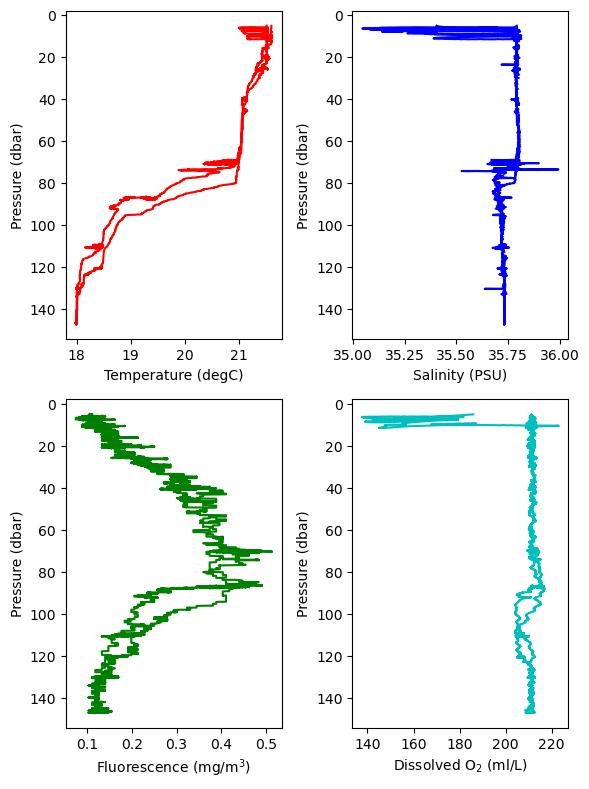

In [ ]:
fig, axs = plt.subplots(2, 2, figsize = (6, 8))
axs = axs.flatten()

axs[0].plot(data['t090C'][idx], data['prDM'][idx], 'r')
axs[0].set_xlabel('Temperature (degC)')
axs[1].plot(data['sal11'][idx], data['prDM'][idx], 'b')
axs[1].set_xlabel('Salinity (PSU)')
axs[2].plot(data['flECO_AFL'][idx], data['prDM'][idx], 'g')
axs[2].set_xlabel('Fluorescence (mg/m$^3$)')
axs[3].plot(data['sbeox0MmL'][idx], data['prDM'][idx], 'c')
axs[3].set_xlabel('Dissolved O$_2$ (ml/L)')
# Invert the yaxis and add pressure label
for ax in axs:
    ax.invert_yaxis();
    ax.set_ylabel('Pressure (dbar)');
plt.tight_layout()